## Convolutional Neural Networks - Understanding CNN Layer Operations
There are two types of layers in a CNN model
* CNN layers
* Pooling Layers

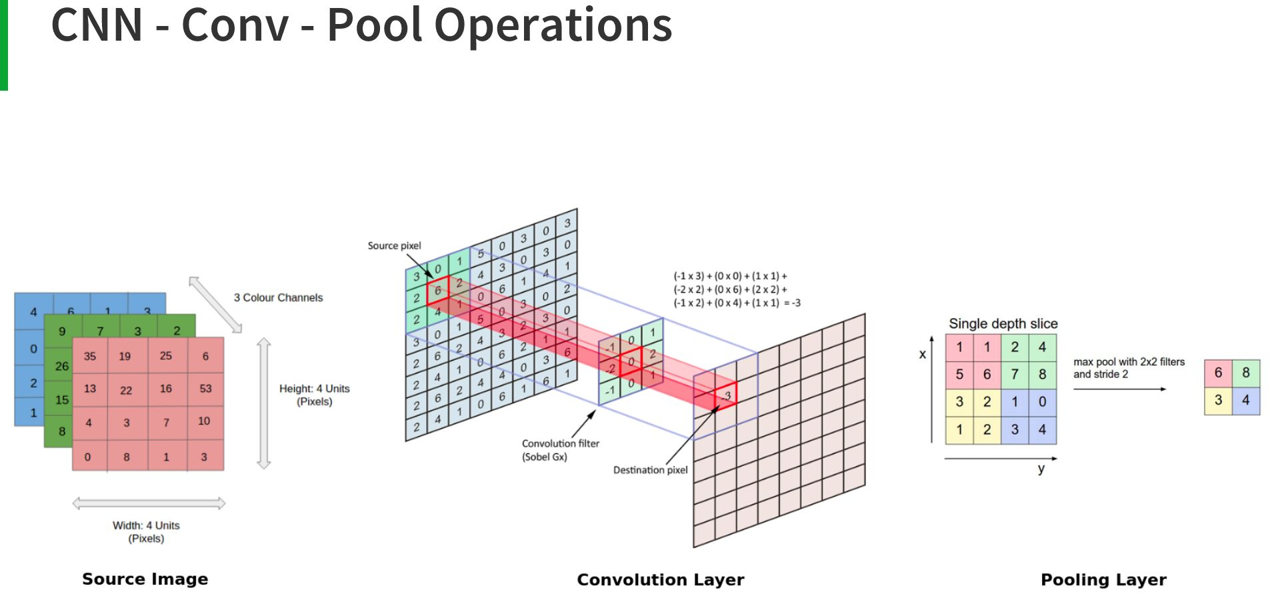

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [2]:
# Load image
img = ImageOps.grayscale(Image.open('tiger.jpg'))
img = np.array(img)

In [3]:
img, img.shape

(array([[47, 50, 53, ..., 92, 92, 91],
        [48, 51, 54, ..., 92, 91, 91],
        [51, 53, 57, ..., 91, 91, 90],
        ...,
        [25, 32, 36, ..., 66, 66, 66],
        [20, 31, 41, ..., 69, 69, 69],
        [23, 35, 46, ..., 71, 71, 71]], dtype=uint8),
 (183, 275))

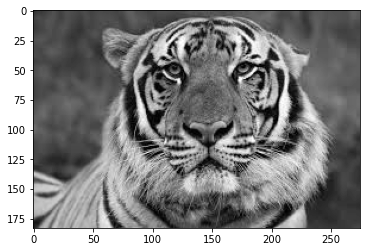

In [5]:
plt.imshow(img, cmap='gray')

## Implement a Conv2D layer

In [6]:
def Conv2D(img, conv_filter):
    img_copy = np.copy(img)
    #get dimensions
    size_x, size_y = img_copy.shape
    
    # for every pixel(x, y) in the image => (iteration)
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            # Init conv ops result = 0.0
            conv = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            conv += (img[x-1, y-1] * conv_filter[0][0])
            conv += (img[x, y-1] * conv_filter[0][1])
            conv += (img[x+1, y-1] * conv_filter[0][2])
            
            conv += (img[x-1, y] * conv_filter[1][0])
            conv += (img[x, y] * conv_filter[1][1])
            conv += (img[x+1, y] * conv_filter[1][2])
            
            conv += (img[x-1, y+1] * conv_filter[2][0])
            conv += (img[x, y+1] * conv_filter[2][1])
            conv += (img[x+1, y+1] * conv_filter[2][2])
            
            filter_wt_sum = np.sum(conv_filter)
            # Normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            conv = conv * weight
            
            # clip max \ min pixels
            if(conv < 0):
                conv = 0
            if (conv > 255):
                conv = 255
            # assign the conv ops result to the new image pixel img_copy(x, y)
            img_copy[x, y] = conv
    return img_copy

## Conv2D ops with different Kernels
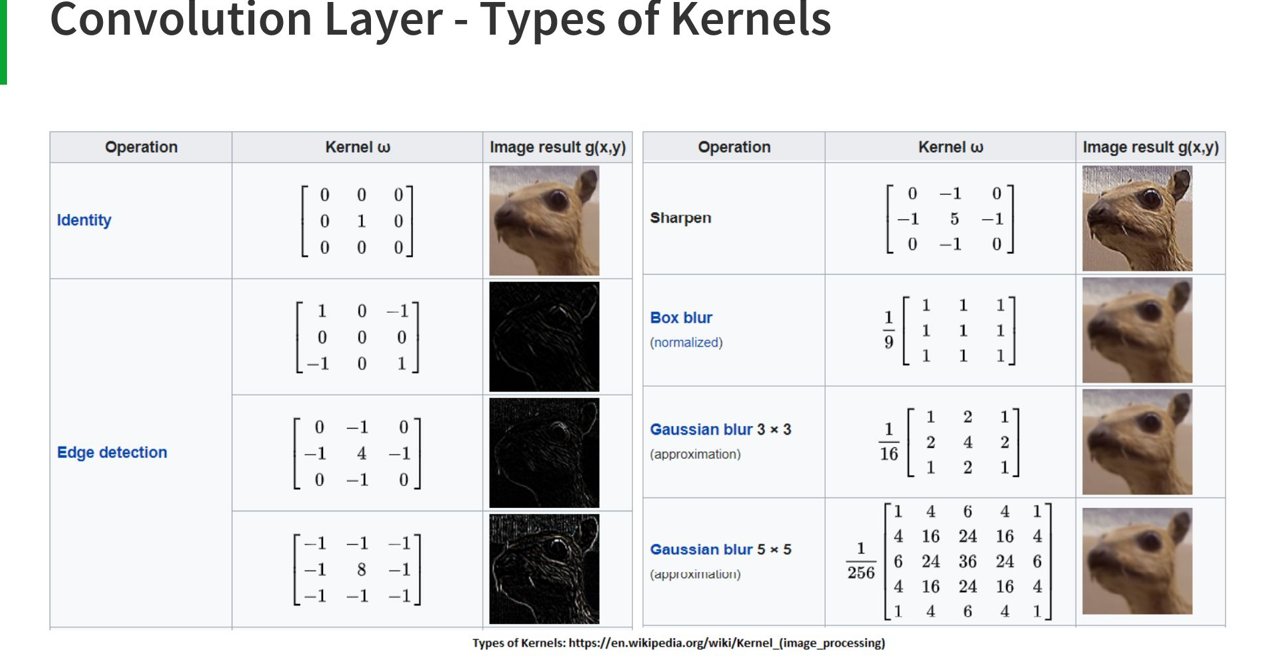

### 1. Edge Detection - Sobel $G_y$ (vertical edges)

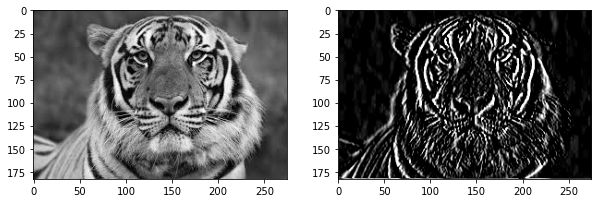

In [10]:
conv_res = Conv2D(img=img, conv_filter=[[-1, -2, -1],
                                        [0, 0, 0],
                                        [1, 2, 1]])

f, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')

### 2. Edge Detection - Sobel $G_x$ (horizontal edges)

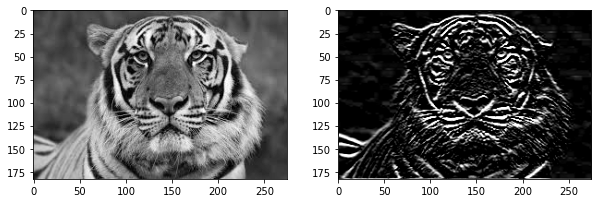

In [11]:
conv_res = Conv2D(img=img, conv_filter=[[-1, 0, 1],
                                        [-2, 0, 2],
                                        [-1, 0, 1]])
f, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')

### 3. Edge Detection: Outline Kernel

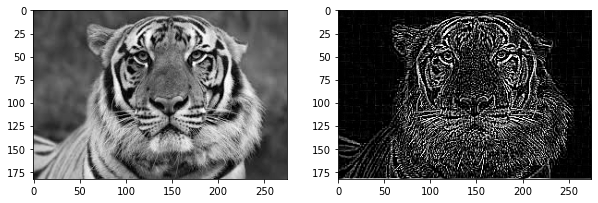

In [12]:
conv_res = Conv2D(img, conv_filter=[[-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]])

f, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')

### 4. Emboss Kernel

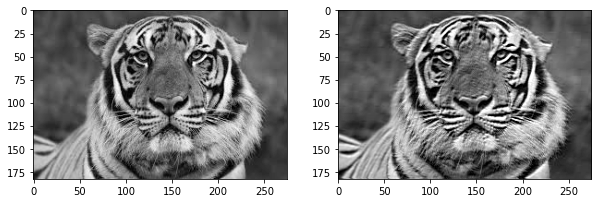

In [14]:
conv_res = Conv2D(img, conv_filter=[[-1, 1, 0],
                                    [-1, 0, 1],
                                    [0, 1, 1]])

f, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')

### 5. Gaussian Blur Kernel

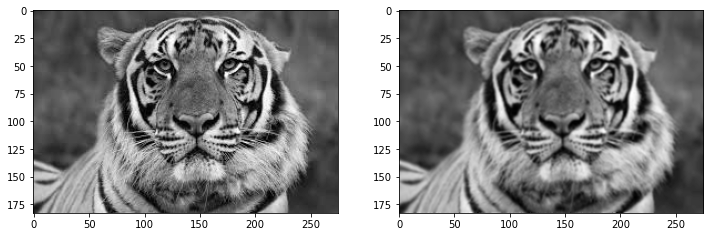

In [16]:
conv_res = Conv2D(img, conv_filter=np.array([[1, 2, 1],
                                             [2, 4, 2],
                                             [1, 2, 1]]) /16.)  # np.array is done to convert the list into float compatible

f, ax = plt.subplots(1, 2, figsize=(12, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')

### 6. Sharpen Kernel

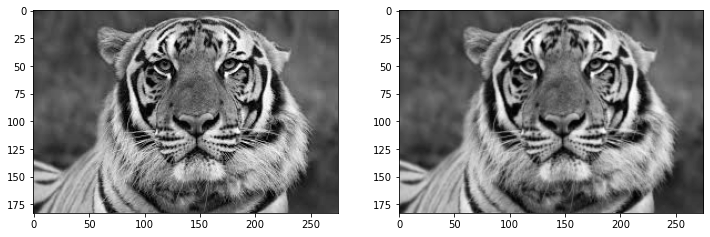

In [17]:
conv_res = Conv2D(img, conv_filter=[[0, -1, 0],
                                    [-1, -5, -1],
                                    [0, -1, 0]])
f, ax = plt.subplots(1, 2, figsize=(12, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')

## Implement MaxPooling-2D Layer

In [20]:
def MaxPooling2D(img):
    size_x, size_y = img.shape
    # Generate new Image
    new_size_x, new_size_y = size_x//2, size_y//2
    image_new = np.zeros((new_size_x, new_size_y))
    
    # For each pixel (x, y) in image with interval of 2
    for x in range(0, size_x-1, 2):
        for y in range(0, size_y-1, 2):
            # init pixel values []
            pixels = []
            
            # Apply MaxPool on 2x2 patch of image
            #  Image Patch (2x2)              
            # [ x, y ] [x+1, y  ]    
            # [x, y+1] [x+1, y+1]   
            pixels.append(img[x, y])
            pixels.append(img[x+1, y])
            
            pixels.append(img[x, y+1])
            pixels.append(img[x+1, y+1])
            
            # Take max of pixels to assign to a new image pixel image_new(x, y)
            image_new[x//2, y//2] = max(pixels)
    return image_new

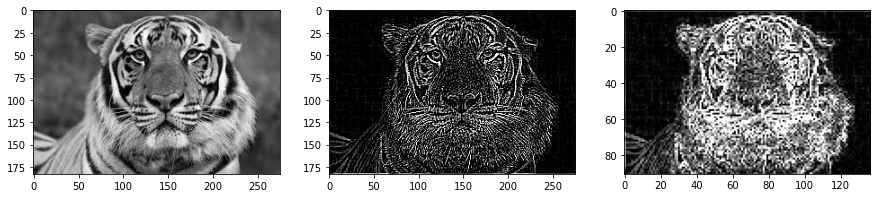

In [23]:
# Examples

conv_res = Conv2D(img, conv_filter=[[-1, -1, -1],  # Outline Kernel
                                    [-1, 8, -1],
                                    [-1, -1, -1]])
pool_res = MaxPooling2D(conv_res)

f, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_res, cmap='gray')
ax[2].imshow(pool_res, cmap='gray')

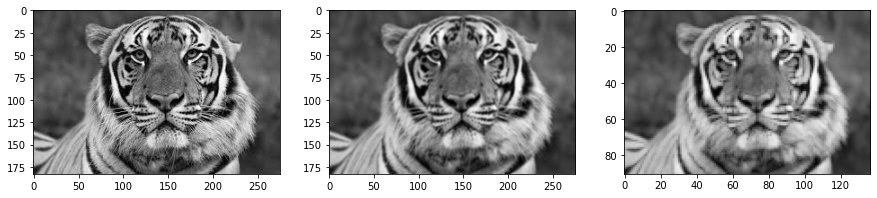

In [26]:
conv_res = Conv2D(img, conv_filter=np.array([[1, 2, 1], 
                                             [2, 4, 2], 
                                             [1, 2, 1]])/16.) # Gaussian Blur Kernel
pool_res = MaxPooling2D(conv_res)

f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(img, cmap='gray');
ax[1].imshow(conv_res, cmap='gray');
ax[2].imshow(pool_res, cmap='gray');

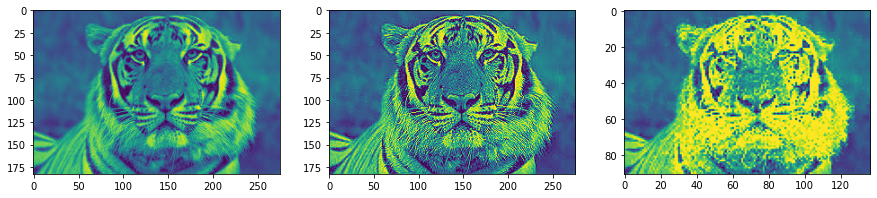

In [27]:
conv_res = Conv2D(img, conv_filter=[[0, -1, 0], 
                                    [-1, 5, -1], 
                                    [0, -1, 0]]) # Sharpen Kernel
pool_res = MaxPooling2D(conv_res)

f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(img);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);